<a href="https://colab.research.google.com/github/leo-contigo/ML/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_02%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12W 딥러닝
## - 교재 : 모두의 딥러닝
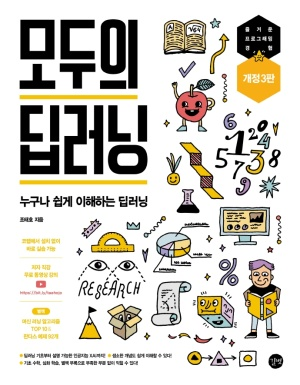

In [ ]:
# 경고 뜨지 않게 
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 텐서플로

- 구글에서 만든 딥러닝 전용 라이브러리.
- 여러 가지 알고리즘을 활용해 다양한 딥러닝 작업을 할 수 있지만, 사용법이 쉽지 않은 단점....

- 이걸 해결해 주기 위해 케라스 개발 됨.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# 텐서플로우(tensorflow)의 케라스(keras)라는 API에 있는 모델(model) 클래스로 부터 Sequential()함수를 불러온다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 깃허브에 있는 데이터 불러오기
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


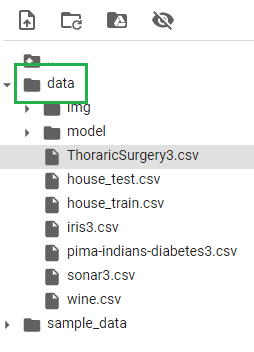

In [ ]:
data = np.loadtxt('/content/data/ThoraricSurgery3.csv', delimiter=',')
data_set = pd.DataFrame(data)
data_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


In [ ]:
# columns 16번은 정답 = class
# 딥러닝은 속성과 클래스로 구분
# x = 속성, y = 클래스

In [ ]:
X = data_set.drop(16, axis=1)
y = data_set[16]

display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0
1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0
2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0
3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0
466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0
467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0
468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0


0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
465    0.0
466    0.0
467    0.0
468    0.0
469    0.0
Name: 16, Length: 470, dtype: float64

# 딥러닝 구조

In [ ]:
# Sequential()함수를 model로 선언

# 신경망 관리하는 객체
# Sequential()함수는 딥러닝 한층, 한층 model.add()라는 함수를 통해 추가.
# 신경망 : 입력층 → 은닉층 → 출력층 으로 구성됨.
model = Sequential()

# 첫번째 은닉층 : input_dim 은 입력층의 노드의 개수 / 입력데이터 컬럼 수와 동일하게 작성해야함.
# input_dim = 컬럼 수
# 첫 번째 숫자( 30 ) 은닉층 노드의 개수 - 적당히 .. 설정..
model.add(Dense(30, input_dim=16, activation='relu'))

# Dense : 선형 회귀를 수행하는 layer = 선형층 / 입력과 출력을 연결
# 마지막에 설정한 레이어는 무조건 출력층
# Dense의 1은 출력 데이터 종류의 수  
model.add(Dense(1, activation='sigmoid'))


# 모델 실행
# loss : 학습 시 수행하는 평가때 사용할 손실함수 / 진짜 결과와 예측 결과의 오차 확인
# optimizer =  : loss 에서 설정한 함수를 통해 구한 손실값을 기반으로 신경망 모델을 보정하는 함수
# metrics = [] : 추가로 평가하고자 하는 평가 기준을 설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=16)
model.summary()

Epoch 1/5
30/30 [==============================] - 1s 3ms/step - loss: 0.8398 - accuracy: 0.7191
Epoch 2/5
30/30 [==============================] - 0s 7ms/step - loss: 0.4989 - accuracy: 0.8340
Epoch 3/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8468
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8468
Epoch 5/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4315 - accuracy: 0.8489
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
___________________________________

In [ ]:
# 내가 이 표의 뜻을 몰라서 따로 검색해서 확인해봄..
# 총 30개의 노드 생성되고 마지막엔 1개
# y = ax + b
# Dense_1 은 검색한대로 알아보니 왜 인지 알겟는데
# 그거대로 계산하면 510도 안나옴 ...??



---



In [ ]:
# 학습

# epochs = : 학습 횟수, 학습 횟수가 많으면 과적합됨. 
# 무조건 많이 ~~~ 나중에 중단 시킬 수 있음

# batch_size = : 메모리에 한번에 올릴 데이터의 양( 행의 개수 )
# 적게주면 메모리에 여유가 있지만 오래 걸린다.
# 적당히 ......  무조건 많이 설정하고 오류나면 낮춰라..

model.fit(X , y , epochs=30 , batch_size = 10)

Epoch 1/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8489
Epoch 2/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.8511
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8511
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8489
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8468
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8511
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8511
Epoch 8/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8489
Epoch 9/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8489
Epoch 10/30
47/47 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8489
Epoch 11/30
47/47 [

In [ ]:
# 예측
pred1 = model.predict(X)
pred1

array([[0.3704566 ],
       [0.1345301 ],
       [0.09355953],
       [0.05299556],
       [0.16169733],
       [0.11793268],
       [0.13759571],
       [0.06338859],
       [0.09878013],
       [0.1131646 ],
       [0.14078623],
       [0.06258005],
       [0.09598967],
       [0.1923224 ],
       [0.07210097],
       [0.06600258],
       [0.14428908],
       [0.09760183],
       [0.12098986],
       [0.04417285],
       [0.08213907],
       [0.09444469],
       [0.11960405],
       [0.05316126],
       [0.07631946],
       [0.02726743],
       [0.06810164],
       [0.07781714],
       [0.12307626],
       [0.06753159],
       [0.42984995],
       [0.09790406],
       [0.24155927],
       [0.20515314],
       [0.04331696],
       [0.08562589],
       [0.11754432],
       [0.28717983],
       [0.04964814],
       [0.06382331],
       [0.08672929],
       [0.09741125],
       [0.09235841],
       [0.2161918 ],
       [0.1644682 ],
       [0.07145667],
       [0.07463571],
       [0.103

In [ ]:
# 0.5 초과는 1 아닌 것은 0 으로 환산
result1 = ( pred1 > 0.5 ).astype(int)
result1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# 정확도 확인

# 평가함수
# 분류용 
from sklearn.metrics import accuracy_score

score1 = accuracy_score( y, result1)
score1

0.8489361702127659